------------

# Комментарии 2

Привет, Сергей!

Комментарии после доработки проекта оставляла в таких ячейках.

Ты справился с проектом) правда, в конце возникла путаница с выбором метода проверки гипотез :(

Читай комментарии :) Надеюсь, тебе все будет понятно :)

------------

------------

# Комментарии

Привет, Сергей!

Я проверила твою работу и оставила в ней комментарии. Комментарии оформлены в таких ячейках и вставлены сразу после ячейки или группы ячеек, к которым относятся. А в самом низу общие комментарии по работе. Надеюсь, тебе все будет понятно :)

Отправляю тебе проект на доработку, так как у меня не реализовался код до конца при запуске тетрадки. В ячейке 168 у тебя введено несуществующее название переменной (полагаю, что там переменная не *results_m*, а переменная *results_2*). Поправь пожалуйста, эту переменную.

Также оставила тебе комментарии по части предобработки и частично по части расчета метрик. Было бы хорошо, если бы ты учел их при доработке проекта и отправил мне работу с корректировками на этом этапе, так как они влияют на весь анализ.

***Удачи !!!***

------------

№1. Этап 
---
Просмотрим данные из DF о клиентах /datasets/users.csv

In [180]:
from scipy import stats as st
import pandas as pd
import numpy as np
data_users = pd.read_csv('/datasets/users.csv')
data_users.tail()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [181]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.3+ KB


In [182]:
data_users.shape[0]

500

------------

# Комментарии

Отлично)

Размерность таблицы при реализации метода **info** указывается в первых двух строках выводимой таблицы. Информация о количестве наблюдений в первой строке (*RangeIndex*). Тогда твой третий шаг выводит информацию, которая тебе уже известна в результате применения **info** :)

------------

№1.2 Этап
---
__Проверим данные на дубликаты__

In [183]:
data_users.duplicated().sum()

0

Как видно дубликатов нет, но однако в таких столбиках как _city, first_name, last_name_ могут возникнуть повторы из-за:
   1. использования прописных и строчных
   2. использования "е" или "ё" и т.п. 

In [184]:
data_users['city'] = data_users['city'].astype(str)
data_users['city'] = data_users['city'].str.lower()
data_users['first_name'] = data_users['first_name'].astype(str)
data_users['first_name'] = data_users['first_name'].str.lower()
data_users['last_name'] = data_users['last_name'].astype(str)
data_users['last_name'] = data_users['last_name'].str.lower()

data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra
1,1001,41,NaN,москва,иван,ежов,2018-11-01,smart
2,1002,59,NaN,стерлитамак,евгений,абрамович,2018-06-17,smart
3,1003,23,NaN,москва,белла,белякова,2018-08-17,ultra
4,1004,68,NaN,новокузнецк,татьяна,авдеенко,2018-05-14,ultra


------------

# Комментарии

Хорошо) почему решаешь изенить тип данных у текстовых столбцов на текстовый формат? 

------------

In [185]:
data_users.duplicated().sum()

0

Методом _.value_counts()_ просомтрим какие данные есть в данных столбцах

In [186]:
data_users['city'].value_counts()


москва              99
санкт-петербург     39
новосибирск         16
омск                14
казань              14
уфа                 12
екатеринбург        11
ульяновск           11
краснодар           11
набережные челны    11
челябинск            9
самара               9
пермь                8
нижний новгород      8
волгоград            8
новокузнецк          7
вологда              7
красноярск           7
улан-удэ             7
тюмень               6
ростов-на-дону       6
томск                6
пенза                6
воронеж              6
киров                6
иркутск              6
сочи                 6
балашиха             5
махачкала            5
ставрополь           5
                    ..
стерлитамак          3
нижний тагил         3
орёл                 3
владимир             3
саратов              3
курган               3
барнаул              3
ярославль            3
севастополь          3
якутск               3
чебоксары            3
тула                 2
тамбов     

In [187]:
data_users['first_name'].value_counts()

радим         6
леонид        5
пётр          5
веселина      4
мариетта      4
матвей        4
габриель      4
рубен         4
лола          4
всеволод      4
алиса         4
александр     4
леон          4
андрей        4
руслан        4
кристина      4
клавдия       4
тамара        4
артём         4
марта         4
лолита        4
адам          4
рауль         4
альбин        3
касьян        3
иулиан        3
вениамин      3
маргарита     3
татьяна       3
эмилия        3
             ..
семён         1
эдита         1
геннадий      1
анфиса        1
мадина        1
георгина      1
ангелина      1
мальвина      1
виолетта      1
рената        1
джулия        1
илья          1
джозефина     1
иннокентий    1
анита         1
эллада        1
трифон        1
белла         1
юрий          1
аким          1
трофим        1
денис         1
саида         1
агата         1
галина        1
руслана       1
гарри         1
рем           1
лейла         1
дебора        1
Name: first_name, Length

In [188]:
data_users['last_name'].value_counts()

андреенко        5
анищенко         3
аркадьев         3
булгаков         3
алексеенко       3
абашкина         3
аничкина         3
соловьев         3
озерова          3
березина         3
ёрохов           2
андропова        2
жукова           2
ситникова        2
зубкова          2
алфимова         2
сомова           2
голованова       2
александрович    2
авринский        2
белякова         2
жданов           2
колесова         2
алешин           2
касьянова        2
абдулина         2
мишин            2
федосеев         2
наумов           2
чижова           2
                ..
кольцова         1
русанова         1
макаров          1
толкачев         1
казанцев         1
трофимова        1
бородина         1
лаптева          1
ёркин            1
амелишко         1
антипов          1
абаимов          1
коршунов         1
малинина         1
зайцев           1
добрынина        1
ахматулина       1
зуев             1
пономарев        1
иванова          1
некрасов         1
ахмедов     

Как видно повторов нет.

------------

# Комментарии

Отлично :)

Для того, чтобы упростить поиск повторений из-за букв *е* и *ё*, можно попробовать применить [регулярные выражения](https://habr.com/ru/post/349860/).

------------

№1.2 Этап
---
Рассмотрим столбец пропуски в столбце _churn_date_

Как видно из условия, данные в этом столбце пропушены при условии если тариф является действующим, для дополнительного анализа можем расчитать срок пользования тарифом

Изменим данные в столбцах _churn_date_ и _reg_date_  с формата __object__ в формат __datetime64__

In [189]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

In [190]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')

In [191]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.3+ KB


------------

# Комментарии

Хорошо)

------------

№2 Этап.
----
Просмотрим данные из таблицы _calls_

In [192]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [193]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [194]:
data_calls.shape[0]

202607

In [195]:
data_calls.duplicated().sum()

0

Как видно из таблицы, нет пропущенных данных, но есть значения в столбце _duration_ равное 0. подсчитаем количество данных равных 0. Для этого создадим таблицу _data_calls_0_



In [196]:
data_calls_0 = data_calls[data_calls['duration'] == 0]

In [197]:
data_calls_0.shape[0]

39613

------------

# Комментарии

Хорошо)

Так как таблицу *data_calls_0* ты далее не используешь, и она тебе нужна только для расчета количества звонков длительностью 0 минут, то нет смысла создавать эту переменную, так как она нагружает память. Необходимую тебе цифру можно было получить, записав, например, выражение *len(data_calls[data_calls['duration'] == 0])*.

------------

In [198]:
(data_calls_0.shape[0] / data_calls.shape[0]) * 100


19.551644316336553

__19.55%__ являтеся достаточно большим процентом просмотрим, распределение данных по пользователя

Просмотрим какое колчиество звонков поподает в диапазано равный 0 и от 0 до 5 секунд (0.083 минуты)

------------

# Комментарии

Хорошо)

Почему выбираешь границу диапазона в 5 секунд? На основе чего ты выбрал этот промежуток?

Какова минимальная длительность разговора, которая зафиксирована в таблице (за исключением 0.00 минут)?

------------

In [199]:
def calls(data):
    duration = data['duration']
    if duration == 0:
        return 1
    else:
        return 0
data_calls['duration_0'] = data_calls.apply(calls, axis=1)

In [200]:
def calls_1(data):
    duration_0 = data['duration']
    if (duration_0 > 0) & (duration_0 <= 0.083):
        return 1
    else:
        return 0
data_calls['duration_5'] = data_calls.apply(calls_1, axis=1)

In [201]:
data_calls.head()

,id,call_date,duration,user_id,duration_0,duration_5
0,1000_0,2018-07-25,0.00,1000,1,0
1,1000_1,2018-08-17,0.00,1000,1,0
2,1000_2,2018-06-11,2.85,1000,0,0
3,1000_3,2018-09-21,13.80,1000,0,0
4,1000_4,2018-12-15,5.18,1000,0,0


Сгруппируем данные в таблице и просмотрим какую долю занимают звонки с 0 значением и звонки до 5 секунд

In [202]:
calls_0 = data_calls.groupby('user_id').agg({'duration_0': ['count', 'sum'], 'duration_5': ['sum']})
calls_0.columns = ['calls_count', 'sum_calls_0', 'sum_calls_5']
calls_0

,calls_count,sum_calls_0,sum_calls_5
user_id,,,
1000,368,75,1
1001,122,30,1
1002,217,44,1
1003,520,92,3
1004,176,37,0
1005,888,167,4
1006,506,94,1
1007,612,131,1
1008,52,11,0


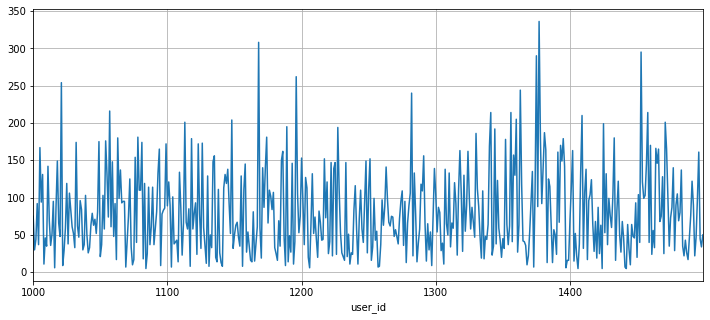

In [203]:
calls_0['sum_calls_0'].plot(grid=True, figsize=(12, 5))

Как видно есть как большое значение так и маленькое. Просмотрим как изменяется относительная доля 0 звонков 

In [204]:
calls_0['share_0'] = calls_0['sum_calls_0'] / calls_0['calls_count']

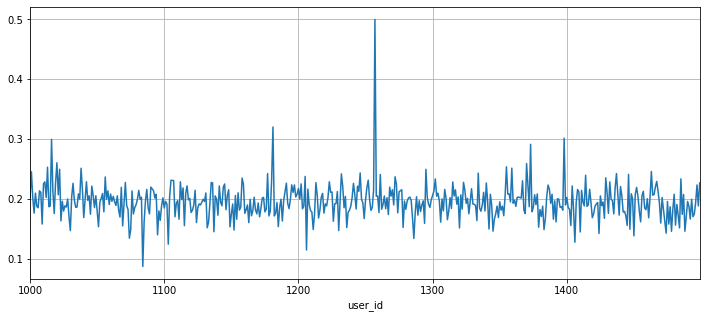

In [205]:
calls_0['share_0'].plot(grid=True, figsize=(12, 5))

------------

# Комментарии

Не забывай подписывать все оси и выводит названия графиков :)

------------

Как видно из графика существет клиент, у которого доля 0 звонков около 50%, 3 клиента для которых равна и более 30%. при анализе данные об этих клиентов стоит исключить из DF. 

Для того, что бы увидеть определим данных клиентов
    

------------

# Комментарии

Окей) Почему стоит удалить данные об этих клиентах?

------------

In [206]:
big_calls_0 = calls_0[calls_0['share_0'] >= 0.3]
big_calls_0

,calls_count,sum_calls_0,sum_calls_5,share_0
user_id,,,,
1016,20,6,0,0.300000
1181,78,25,0,0.320513
1257,14,7,0,0.500000
1398,53,16,0,0.301887


Просмотрим  данные о звонках которые не привышают 5 секунд, при том обратите внимение что количество звонков меньше 5 с отсутсвует, что говорит о большой вероятности отсуствия ошибок у клиента

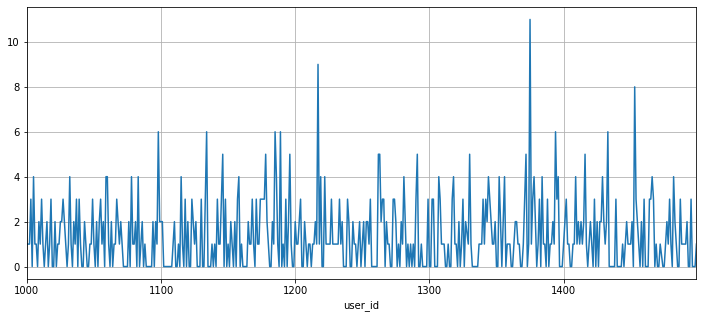

In [207]:
calls_0['sum_calls_5'].plot(grid=True, figsize=(12, 5))

In [208]:
calls_0['share_5'] = calls_0['sum_calls_5'] / calls_0['calls_count']

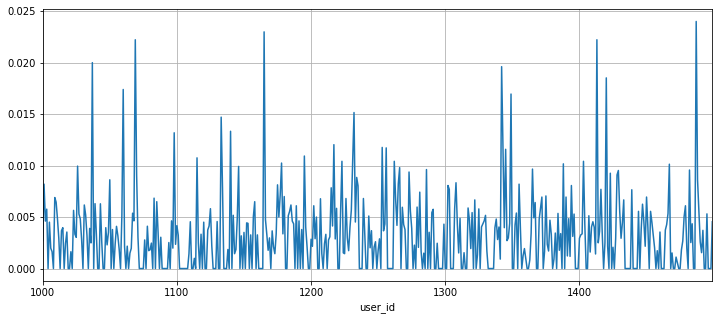

In [209]:
calls_0['share_5'].plot(grid=True, figsize=(12, 5))

В целом в данные звонки попадают в диапазон до 2,5%, что является незначительной ошибкой

Создадим DF, которая не будет содержать данные о нулевых значениях 

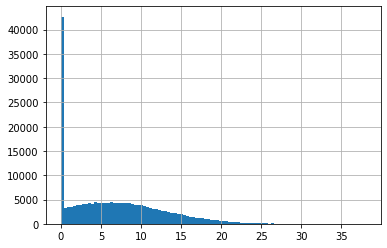

In [210]:
data_calls['duration'].hist(bins = 100)

In [211]:
data_calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [212]:
non_0_calls = data_calls[data_calls['duration'] != 0]

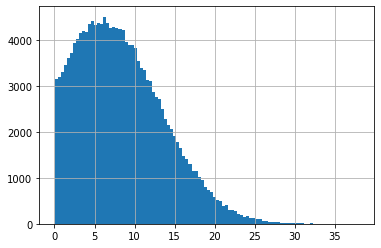

In [213]:
non_0_calls['duration'].hist(bins = 100)

In [214]:
non_0_calls['duration'].describe()

count    162994.000000
mean          8.397794
std           5.353022
min           0.010000
25%           4.170000
50%           7.740000
75%          11.850000
max          38.000000
Name: duration, dtype: float64

Как видно нулевые значения разговоров вносят мущественную ошибку. 

Теперь возникает вопрос как быть с этими данными. Для дальнейшего анализа предлагаю убрать эти данные, так как если будем заменять на любое значение, то у нас может возникнуть достаточно большая ошибка так как 0 значений более 40000% или около 20%.

In [215]:
data_calls_non_0 = non_0_calls

------------

# Комментарии

Хорошо)

Как вариант, эти данные можно удалить, так как они не показывают адекватно длительность разговора. Также, разговор длительностью менее секунды вызывает подозрение. Возможно это связано с тем, что человек часто вызывает ошибочный номер и сбрасывает его. Ты не делаешь предположений о причинах возникновения этих нулей :(

Удаляя эти нули, ты избавляешься от потенциальной ошибки неверного анализа времени разговора. Однако, в рамках данной работы мы исследуем доход, который получает оператор "Мегалайн" от предоставления услуг связи. Согласно их политике длительность любого разговора округляется с точностью до минуты наверх, а каждая минута имеет свою цену. Таким образом, даже звонки, которые длились меньше 1 секунды и представлены в выборке нулями, принесли оператору дополнительный доход. Удаляя нули, ты занижаешь доход, который получил оператор, что в дальнейшем скажется на результате анализа :(

------------

№2.1 Этап
---
Переведем данные из столбца _call_date_ из формата __object__ в формат __datetime64__

 

In [216]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

In [217]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 6 columns):
id            202607 non-null object
call_date     202607 non-null datetime64[ns]
duration      202607 non-null float64
user_id       202607 non-null int64
duration_0    202607 non-null int64
duration_5    202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.3+ MB


Как видно формат изменен

------------

# Комментарии

Хорошо)

Изменяем формат на дату.

------------

№3 Этап
---
Просмотрим данные в таблице _messages_

In [218]:
data_message = pd.read_csv('/datasets/messages.csv')
data_message.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [219]:
data_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [220]:
data_message.shape[0]

123036

In [221]:
data_message.duplicated().sum()

0

------------

# Комментарии

Хорошо)

------------

№3.1 Этап
---
Переведем данные из столбца _message_date_ из формата __object__ в формат __datetime64__

In [222]:
data_message['message_date'] = pd.to_datetime(data_message['message_date'], format='%Y-%m-%d')

In [223]:
data_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


------------

# Комментарии

Хорошо)

------------

№4 Этап
---
Просмотрим данные в таблице _internet_

In [224]:
data_internet  = pd.read_csv('/datasets/internet.csv')
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [225]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [226]:
data_internet.shape[0]

149396

In [227]:
data_internet.duplicated().sum()

0

Как видно пропущенные данные отсутсвуют. Изменим формат данных в столбце _session_date_

In [228]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

In [229]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Просмотрим данные о пользовании интернета при котором трафик равен 0

In [230]:
mb_used_0 = data_internet[data_internet['mb_used'] == 0]
mb_used_0

,id,mb_used,session_date,user_id
11,1000_11,0.0,2018-08-28,1000
38,1000_38,0.0,2018-11-27,1000
46,1000_46,0.0,2018-06-30,1000
67,1000_67,0.0,2018-06-16,1000
72,1000_72,0.0,2018-06-15,1000
103,1000_103,0.0,2018-05-26,1000
111,1000_111,0.0,2018-09-01,1000
131,1000_131,0.0,2018-06-15,1000
143,1000_143,0.0,2018-12-29,1000
157,1000_157,0.0,2018-07-11,1000


In [231]:
mb_used_0.shape[0] / data_internet.shape[0]

0.13118155773916304

Как видем доля 0 значений трафика также достаточно велика. Просмотрим как она отображается на диаграмме

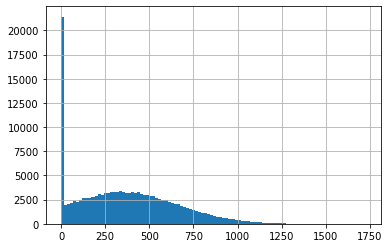

In [232]:
data_internet['mb_used'].hist(bins = 100)

In [233]:
data_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [234]:
data_internet_non_0 = data_internet[data_internet['mb_used'] !=0]

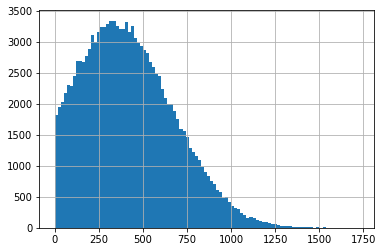

In [235]:
data_internet_non_0['mb_used'].hist(bins=100)

In [236]:
data_internet_non_0['mb_used'].describe()

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

------------

# Комментарии

Хорошо)

Что ты можешь сказать про эти нули? В чем причина их появления?

------------

№4 Этап
---
Просмотрим данные в таблице _tariffs_

In [237]:
data_tariffs  = pd.read_csv('/datasets/tariffs.csv')
data_tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Как видно вся инфомация в таблице запоолненна

Резюме о проделанной работе
----
Открыт файлы с данными и изучина общая информация

Путь к файлам:
   - /datasets/calls.csv
   - /datasets/internet.csv
   - /datasets/messages.csv
   - /datasets/tariffs.csv
   - /datasets/users.csv
   
Подготовлены данные
   - Данные в столбцах _reg_date, churn_date, call_date, session_date_ приведен к типу __datetime64[ns]__
   - Найдены излишнее количество _0_ значений в таблицах _calls['duration']_ и _internet['mb_used']_. Для того, что бы понять как с этими данными поступить лучше задать вопросы:
      1. Списывается ли одна минута звонка при значении duration = 0?
      2. Списиывается ли 1 Мб при значения  mb_used = 0?
   
   
~Так как доля данных с 0 высока и предпологая, что компания __0__ значения не округляет, то для дальнейшего анализа не будем использовать данные~


------------

# Комментарии

Отлично :) классное резюме )

Отвечаю на вопросы: 

1. Да, любая длительность звонка меньше 1 минуты приравнивается к 1 минуте при расчете расходов;
2. Да, аналогично 1 пункту :)

------------

Коррекциция 
---
При дальнейшем анализе использовал полный DF с учетом 0 значений по звонкам и израсходованному интернет-трафику

Ответим на следующие вопросы
---
   - количество сделанных звонков и израсходованных минут разговора по месяцам;
   - количество отправленных сообщений по месяцам;
   - объем израсходованного интернет-трафика по месяцам;
   - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана).

При подсчете количества сделанных звонков и израсходованных минут необходимо учитывать условие __«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута__

Для этого в таблице _calls_ создадим столбец _whole_minutes_

In [238]:
def whole_minutes(data):
    minutes = data['duration']
    return int(minutes)+1
data_calls['whole_minutes'] = data_calls.apply(whole_minutes, axis = 1)

In [239]:
data_calls.head()

,id,call_date,duration,user_id,duration_0,duration_5,whole_minutes
0,1000_0,2018-07-25,0.00,1000,1,0,1
1,1000_1,2018-08-17,0.00,1000,1,0,1
2,1000_2,2018-06-11,2.85,1000,0,0,3
3,1000_3,2018-09-21,13.80,1000,0,0,14
4,1000_4,2018-12-15,5.18,1000,0,0,6


In [240]:
data_calls['call_date'].describe()

count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object

Так как у нас данные только за 2018 год, то применем метод dt.month для определения месяцев

In [241]:
data_calls['month'] = data_calls['call_date'].dt.month

In [242]:
data_calls.head()

,id,call_date,duration,user_id,duration_0,duration_5,whole_minutes,month
0,1000_0,2018-07-25,0.00,1000,1,0,1,7
1,1000_1,2018-08-17,0.00,1000,1,0,1,8
2,1000_2,2018-06-11,2.85,1000,0,0,3,6
3,1000_3,2018-09-21,13.80,1000,0,0,14,9
4,1000_4,2018-12-15,5.18,1000,0,0,6,12


In [243]:
month = pd.cut(data_calls['month'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
calls_users = data_calls.pivot_table(index = ['user_id', month], values='whole_minutes', aggfunc=['sum'])
calls_users.columns = ['sum_minutes']
calls_users

sum_minutes
user_id month                
1000    (4, 5]            164
        (5, 6]            187
        (6, 7]            346
        (7, 8]            419
        (8, 9]            479
        (9, 10]           363
        (10, 11]          344
        (11, 12]          341
1001    (10, 11]          444
        (11, 12]          430
1002    (5, 6]            118
        (6, 7]            219
        (7, 8]            296
        (8, 9]            218
        (9, 10]           221
        (10, 11]          250
        (11, 12]          242
1003    (7, 8]            392
        (8, 9]            990
        (9, 10]           867
        (10, 11]          844
        (11, 12]          822
1004    (4, 5]             37
        (5, 6]            177
        (6, 7]            137
        (7, 8]            138
        (8, 9]            125
        (9, 10]           154
        (10, 11]          122
        (11, 12]          136
...                       ...
1494    (10, 11]          430
        (11, 12]          426
1495    (7, 8]             96
        (8, 9]            833
        (9, 10]          1057
        (10, 11]          972
        (11, 12]         1069
1496    (0, 1]             49
        (1, 2]            607
        (2, 3]            569
        (3, 4]            538
        (4, 5]            498
        (5, 6]            572
        (6, 7]            592
        (7, 8]            553
        (8, 9]            496
        (9, 10]           467
        (10, 11]          677
        (11, 12]          533
1497    (9, 10]           506
        (10, 11]          387
        (11, 12]          558
1498    (6, 7]            178
        (7, 8]            414
        (8, 9]            477
        (9, 10]           259
1499    (8, 9]             71
        (9, 10]           474
        (10, 11]          624
        (11, 12]          505

[3174 rows x 1 columns]

------------

# Комментарии

Хорошо)

------------

In [244]:
data_message.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [245]:
data_message['month'] = data_message['message_date'].dt.month

In [246]:
month = pd.cut(data_message['month'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
message_users = data_message.pivot_table(index = ['user_id', month], values='id', aggfunc=['count'])
message_users.columns = ['count_message']
message_users

count_message
user_id month                  
1000    (4, 5]             22.0
        (5, 6]             60.0
        (6, 7]             75.0
        (7, 8]             81.0
        (8, 9]             57.0
        (9, 10]            73.0
        (10, 11]           58.0
        (11, 12]           70.0
1002    (5, 6]              4.0
        (6, 7]             11.0
        (7, 8]             13.0
        (8, 9]              4.0
        (9, 10]            10.0
        (10, 11]           16.0
        (11, 12]           12.0
1003    (7, 8]             37.0
        (8, 9]             91.0
        (9, 10]            83.0
        (10, 11]           94.0
        (11, 12]           75.0
1004    (4, 5]             95.0
        (5, 6]            134.0
        (6, 7]            181.0
        (7, 8]            151.0
        (8, 9]            146.0
        (9, 10]           165.0
        (10, 11]          158.0
        (11, 12]          162.0
1005    (0, 1]              7.0
        (1, 2]             38.0
...                         ...
1493    (10, 11]           16.0
        (11, 12]           78.0
1495    (7, 8]             13.0
        (8, 9]             82.0
        (9, 10]            82.0
        (10, 11]           79.0
        (11, 12]           84.0
1496    (0, 1]              9.0
        (1, 2]             45.0
        (2, 3]             46.0
        (3, 4]             49.0
        (4, 5]             40.0
        (5, 6]             35.0
        (6, 7]             42.0
        (7, 8]             41.0
        (8, 9]             29.0
        (9, 10]            35.0
        (10, 11]           46.0
        (11, 12]           51.0
1497    (9, 10]            20.0
        (10, 11]           14.0
        (11, 12]           17.0
1498    (6, 7]             20.0
        (7, 8]             62.0
        (8, 9]             44.0
        (9, 10]            42.0
1499    (8, 9]             11.0
        (9, 10]            48.0
        (10, 11]           59.0
        (11, 12]           66.0

[2717 rows x 1 columns]

------------

# Комментарии

Хорошо)

------------

При ответе на вопрос __"Объем израсходованного интернет-трафика по месяцам"__ как и в случае со звонками необходимо округлить Мб в большую сторону

In [247]:
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [248]:
data_internet['month'] = data_internet['session_date'].dt.month


In [249]:
def whole_mb_used(data):
    mb_used = data['mb_used']
    return int(mb_used)+1
data_internet['whole_mb_used'] = data_internet.apply(whole_mb_used, axis = 1)

In [250]:
data_internet_non_0.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [251]:
month = pd.cut(data_internet['month'], [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
internet_users = data_internet.pivot_table(index = ['user_id', month], values='whole_mb_used', aggfunc=['sum'])
internet_users.columns = ['sum_mb_used']
internet_users

sum_mb_used
user_id month                
1000    (4, 5]           2257
        (5, 6]          23262
        (6, 7]          14017
        (7, 8]          14072
        (8, 9]          14583
        (9, 10]         14717
        (10, 11]        14769
        (11, 12]         9829
1001    (10, 11]        18460
        (11, 12]        14059
1002    (5, 6]          10878
        (6, 7]          17615
        (7, 8]          20358
        (8, 9]          16725
        (9, 10]         13913
        (10, 11]        18621
        (11, 12]        18149
1003    (7, 8]           8572
        (8, 9]          12479
        (9, 10]         14779
        (10, 11]        11369
        (11, 12]        10132
1004    (4, 5]          13416
        (5, 6]          17621
        (6, 7]          22246
        (7, 8]          28610
        (8, 9]          15130
        (9, 10]         18498
        (10, 11]        15634
        (11, 12]        18042
...                       ...
1494    (10, 11]        18083
        (11, 12]        17650
1495    (7, 8]           2616
        (8, 9]          33109
        (9, 10]         29399
        (10, 11]        38974
        (11, 12]        23451
1496    (0, 1]           3768
        (1, 2]          28537
        (2, 3]          25000
        (3, 4]          21113
        (4, 5]          23751
        (5, 6]          20176
        (6, 7]          24406
        (7, 8]          23569
        (8, 9]          26983
        (9, 10]         28227
        (10, 11]        25113
        (11, 12]        20770
1497    (9, 10]         11516
        (10, 11]        14181
        (11, 12]        19946
1498    (6, 7]           7488
        (7, 8]          24282
        (8, 9]          22188
        (9, 10]         20614
1499    (8, 9]           1849
        (9, 10]         17824
        (10, 11]        17994
        (11, 12]        13082

[3203 rows x 1 columns]

------------

# Комментарии

Хорошо)

------------

Для работы над вопросом __Определите помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана)__ создадим таблицу result_users методом _.join_ из таблиц _calls_users, message_users, internet_users)

In [252]:
result_users = calls_users.join(message_users)
result_users = result_users.join(internet_users)

__Вопрос не получилось объединить три таблицы одной строкой__. _Может быть подскажите, как сделать это одной строкой_

------------

# Комментарии 2

Написать *calls_users.join(message_users).join(internet_users)*, то есть записать операции цепочкой (chaining). Можно сделать через метод **merge**, но здесь также будет несколько операций, которые могут быдь соеденины в цепь.

------------

In [253]:
result_users.head()

sum_minutes  count_message  sum_mb_used
user_id month                                          
1000    (4, 5]          164           22.0       2257.0
        (5, 6]          187           60.0      23262.0
        (6, 7]          346           75.0      14017.0
        (7, 8]          419           81.0      14072.0
        (8, 9]          479           57.0      14583.0

In [254]:
result_users.index

MultiIndex(levels=[[1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 11

Не получилось написать функцию и по работе с данной таблицей. Возможно подскажите в чем ошибся

In [255]:
#def add_tariff(data):
    #user_id = data.index.levels[0]
    #return data_users.loc[data_users['user_id'] == user_id, 'tariff']
#result_users['tariff'] = result_users.apply(add_tariff, axis = 1)

------------

# Комментарии 2

Было бы здорово, если бы ты написал комментарий о том, что пытался сделать этой функцией :)

Думаю, что тебе будет легче с помощью **merge** приклеить к каждому пользователю тариф, не придется писать отдельную функцию.

------------

In [256]:
result_users_1 = result_users.stack()

In [257]:
result_users_2 = result_users_1.reset_index(name='value').rename(columns={'level_2': 'name'})

In [258]:
result_users_2.head()


,user_id,month,name,value
0,1000,"(4, 5]",sum_minutes,164.0
1,1000,"(4, 5]",count_message,22.0
2,1000,"(4, 5]",sum_mb_used,2257.0
3,1000,"(5, 6]",sum_minutes,187.0
4,1000,"(5, 6]",count_message,60.0


In [259]:
result_users_2['month'] = result_users_2['month'].astype(str)

In [260]:
result_users_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 4 columns):
user_id    9015 non-null int64
month      9015 non-null object
name       9015 non-null object
value      9015 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 281.8+ KB


In [261]:
def month(data):
    month = data['month']
    if month == '(0, 1]':
        return 1
    if month == '(1, 2]':
        return 2
    if month == '(2, 3]':
        return 3
    if month == '(3, 4]':
        return 4
    if month == '(4, 5]':
        return 5
    if month == '(5, 6]':
        return 6
    if month == '(6, 7]':
        return 7
    if month == '(7, 8]':
        return 8
    if month == '(8, 9]':
        return 9
    if month == '(9, 10]':
        return 10
    if month == '(10, 11]':
        return 11
    if month == '(11, 12]':
        return 12

result_users_2['month'] = result_users_2.apply(month, axis = 1)  
        

------------

# Комментарии 2

В этой функции допустил ошибку :( Дважды определяешь условия для вывода 4-ого месяца. Похоже, в одном месте должен быть третий месяц.

Зачем ты сначало вводишь одно обозначение для месяцев, а потом его меняешь на другое? Почему нельзя было сразу ввести наиболее удобный формат месяца?

------------

In [262]:
result_users_2.head()

,user_id,month,name,value
0,1000,5,sum_minutes,164.0
1,1000,5,count_message,22.0
2,1000,5,sum_mb_used,2257.0
3,1000,6,sum_minutes,187.0
4,1000,6,count_message,60.0


In [263]:
result_users_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 4 columns):
user_id    9015 non-null int64
month      9015 non-null int64
name       9015 non-null object
value      9015 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 281.8+ KB


Это я проверяю как работают индексы

In [264]:
data_users.loc[492, 'tariff']

'smart'

In [265]:
i = data_users.index[data_users.user_id == 1000]
tempObject=data_users.loc[i, 'tariff']
print(tempObject[0])

ultra


В данном случае написал "костыль", я понимаю что это не правильно но у меня обратно возникли вопросы по индексу уже простому. Пробовал использовать метод .loc

In [266]:
def add_tariff(data):
    user_id = data['user_id'] - 1000
    tariff = data_users.loc[user_id, 'tariff']
    return tariff

------------

# Комментарии 2

Хорошо) уже писала про метод **merge** :)

------------

In [267]:
result_users_2['tariff'] = result_users_2.apply(add_tariff, axis = 1)

In [268]:
result_users_2.head()

,user_id,month,name,value,tariff
0,1000,5,sum_minutes,164.0,ultra
1,1000,5,count_message,22.0,ultra
2,1000,5,sum_mb_used,2257.0,ultra
3,1000,6,sum_minutes,187.0,ultra
4,1000,6,count_message,60.0,ultra


In [269]:
def included(data):
    name = data['name']
    tariff = data['tariff']
    if (name == 'sum_minutes') & (tariff == data_tariffs.loc[0, 'tariff_name']):
        return data_tariffs.loc[0, 'minutes_included']
    elif (name == 'sum_minutes') & (tariff == data_tariffs.loc[1, 'tariff_name']):
        return data_tariffs.loc[1, 'minutes_included']
    elif (name == 'count_message') & (tariff == data_tariffs.loc[0, 'tariff_name']):
        return data_tariffs.loc[0, 'messages_included']
    elif (name == 'count_message') & (tariff == data_tariffs.loc[1, 'tariff_name']):
        return data_tariffs.loc[1, 'messages_included']
    elif (name == 'sum_mb_used') & (tariff == data_tariffs.loc[0, 'tariff_name']):
        return data_tariffs.loc[0, 'mg_per_month_included']
    elif (name == 'sum_mb_used') & (tariff == data_tariffs.loc[1, 'tariff_name']):
        return data_tariffs.loc[1, 'mg_per_month_included']   


In [270]:
result_users_2['included'] = result_users_2.apply(included, axis = 1)

In [271]:
result_users_2.head()

,user_id,month,name,value,tariff,included
0,1000,5,sum_minutes,164.0,ultra,3000
1,1000,5,count_message,22.0,ultra,1000
2,1000,5,sum_mb_used,2257.0,ultra,30720
3,1000,6,sum_minutes,187.0,ultra,3000
4,1000,6,count_message,60.0,ultra,1000


In [272]:
result_users_2['excess'] = result_users_2['value'] - result_users_2['included']

In [273]:
result_users_2.head()

,user_id,month,name,value,tariff,included,excess
0,1000,5,sum_minutes,164.0,ultra,3000,-2836.0
1,1000,5,count_message,22.0,ultra,1000,-978.0
2,1000,5,sum_mb_used,2257.0,ultra,30720,-28463.0
3,1000,6,sum_minutes,187.0,ultra,3000,-2813.0
4,1000,6,count_message,60.0,ultra,1000,-940.0


In [274]:
result_users_2.loc[result_users_2['excess'] < 0, 'excess'] = 0

In [275]:
result_users_2.head()

,user_id,month,name,value,tariff,included,excess
0,1000,5,sum_minutes,164.0,ultra,3000,0.0
1,1000,5,count_message,22.0,ultra,1000,0.0
2,1000,5,sum_mb_used,2257.0,ultra,30720,0.0
3,1000,6,sum_minutes,187.0,ultra,3000,0.0
4,1000,6,count_message,60.0,ultra,1000,0.0


In [276]:
def extra_money(data):
    name = data['name']
    excess = data['excess']
    tariff = data['tariff']
    if (name == 'sum_minutes') & (tariff == data_tariffs.loc[0, 'tariff_name']):
        return excess * data_tariffs.loc[0, 'rub_per_minute']
    elif (name == 'sum_minutes') & (tariff == data_tariffs.loc[1, 'tariff_name']):
        return excess * data_tariffs.loc[1, 'rub_per_minute']
    elif (name == 'count_message') & (tariff == data_tariffs.loc[0, 'tariff_name']):
        return excess * data_tariffs.loc[0, 'rub_per_message']
    elif (name == 'count_message') & (tariff == data_tariffs.loc[1, 'tariff_name']):
        return excess * data_tariffs.loc[1, 'rub_per_message']
    elif (name == 'sum_mb_used') & (tariff == data_tariffs.loc[0, 'tariff_name']):
        return ((excess * data_tariffs.loc[0, 'rub_per_gb']) / 1024)
    elif (name == 'sum_mb_used') & (tariff == data_tariffs.loc[1, 'tariff_name']):
        return ((excess * data_tariffs.loc[1, 'rub_per_gb']) / 1024)

In [277]:
result_users_2['extra_money'] = result_users_2.apply(extra_money, axis = 1)

In [278]:
result_users_2.head()

,user_id,month,name,value,tariff,included,excess,extra_money
0,1000,5,sum_minutes,164.0,ultra,3000,0.0,0.0
1,1000,5,count_message,22.0,ultra,1000,0.0,0.0
2,1000,5,sum_mb_used,2257.0,ultra,30720,0.0,0.0
3,1000,6,sum_minutes,187.0,ultra,3000,0.0,0.0
4,1000,6,count_message,60.0,ultra,1000,0.0,0.0


In [279]:
def city(data):
    user_id = data['user_id'] - 1000
    city = data_users.loc[user_id, 'city']
    return city

In [280]:
result_users_2['city'] = result_users_2.apply(city, axis = 1)

In [281]:
result_users_2.head()

,user_id,month,name,value,tariff,included,excess,extra_money,city
0,1000,5,sum_minutes,164.0,ultra,3000,0.0,0.0,краснодар
1,1000,5,count_message,22.0,ultra,1000,0.0,0.0,краснодар
2,1000,5,sum_mb_used,2257.0,ultra,30720,0.0,0.0,краснодар
3,1000,6,sum_minutes,187.0,ultra,3000,0.0,0.0,краснодар
4,1000,6,count_message,60.0,ultra,1000,0.0,0.0,краснодар


__Мы создали таблицу для дальнейшего анализа данных__

------------

# Комментарии 2

Отлично :)

------------

_Создадим таблицу, которая считает данные стоимости по каждому клиенту в разрезе месяцев_

In [282]:
month = pd.cut(result_users_2['month'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
incom = result_users_2.pivot_table(index = ['user_id', month], values='extra_money', aggfunc=['sum'])
incom.columns = ['extra_money_sum']

In [283]:
incom = incom.stack()
incom = incom.reset_index(name='extra_money').rename(columns={'level_2': 'name'})

In [284]:
incom = incom.drop('name', 1)

In [285]:
incom['month'] = incom['month'].astype(str)

In [362]:
def month_1(data):
    month = data['month']
    if month == '(0, 1]':
        return 1
    if month == '(1, 2]':
        return 2
    if month == '(2, 3]':
        return 3
    if month == '(3, 4]':
        return 4
    if month == '(4, 5]':
        return 5
    if month == '(5, 6]':
        return 6
    if month == '(6, 7]':
        return 7
    if month == '(7, 8]':
        return 8
    if month == '(8, 9]':
        return 9
    if month == '(9, 10]':
        return 10
    if month == '(10, 11]':
        return 11
    if month == '(11, 12]':
        return 12

------------

# Комментарии 2

Здесь также присутствует 2 условия на четвертый месяц :(

------------

In [287]:
incom['month'] = incom.apply(month_1, axis = 1)

In [288]:
def add_tariff_1(data):
    user_id = data['user_id'] - 1000
    tariff = data_users.loc[user_id, 'tariff']
    return tariff

In [289]:
incom['tariff'] = incom.apply(add_tariff_1, axis = 1)

In [290]:
def subscription_fee(data):
    tariff = data['tariff']
    if (tariff == data_tariffs.loc[0, 'tariff_name']):
        return data_tariffs.loc[0, 'rub_monthly_fee']
    elif (tariff == data_tariffs.loc[1, 'tariff_name']):
        return data_tariffs.loc[1, 'rub_monthly_fee']   


In [291]:
incom['rub_monthly_fee'] = incom.apply(subscription_fee, axis = 1)

In [292]:
incom['total_income'] = incom['extra_money'] + incom['rub_monthly_fee']

In [293]:
def city_1(data):
    user_id = data['user_id'] - 1000
    city = data_users.loc[user_id, 'city']
    return city
incom['city'] = incom.apply(city_1, axis = 1)
incom.head()

,user_id,month,extra_money,tariff,rub_monthly_fee,total_income,city
0,1000,5,0.0,ultra,1950,1950.0,краснодар
1,1000,6,0.0,ultra,1950,1950.0,краснодар
2,1000,7,0.0,ultra,1950,1950.0,краснодар
3,1000,8,0.0,ultra,1950,1950.0,краснодар
4,1000,9,0.0,ultra,1950,1950.0,краснодар


Резюме проделанной работы:
---
Рассчитаны для каждого пользователя:
   - количество сделанных звонков и израсходованных минут разговора по месяцам;
   - количество отправленных сообщений по месяцам;
   - объем израсходованного интернет-трафика по месяцам;
   - помесячную выручку с каждого пользователя (вычтен бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножен на значение из тарифного плана).


------------

# Комментарии 2

Отлично :)

------------

Шаг 3 Проанализируйте данные
---
Опишите поведение клиентов оператора, исходя из выборки:
1.	Сколько минут разговора требуется пользователям каждого тарифа в месяц?
2.	Сколько сообщений требуется пользователям каждого тарифа в месяц?
3.	Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?


Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.


__Проанализируем количество минут, требуемых потребителям тарифов__

In [294]:
minutes = result_users_2[result_users_2['name'] == 'sum_minutes']

In [295]:
minutes_ultra = minutes[minutes['tariff'] == 'ultra']

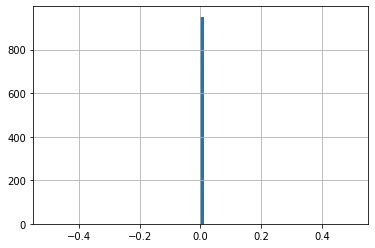

In [296]:
minutes_ultra['excess'].hist(bins=100)

In [297]:
minutes_ultra['excess'].describe()

count    951.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: excess, dtype: float64

count     951.000000
mean      560.669821
std       315.013390
min         1.000000
25%       318.500000
50%       545.000000
75%       777.000000
max      1728.000000
Name: value, dtype: float64

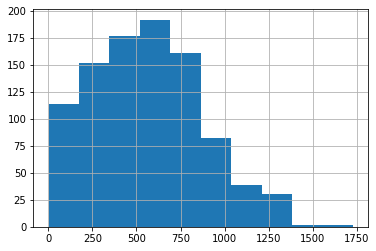

In [298]:
minutes_ultra['value'].hist(bins=10)
minutes_ultra['value'].describe()

Рассчитаем параметры выборки:

In [299]:
mean_calls_ultra = minutes_ultra['value'].mean()
variance_calls_ultra = np.var(minutes_ultra['value'])
standard_deviation_calls_ultra = np.std(minutes_ultra['value'])
var_calls_ultra = standard_deviation_calls_ultra / mean_calls_ultra

In [300]:
print('Среднее значение данных: {:.5}'.format(mean_calls_ultra))
print('Дисперсия: {:.7}'.format(variance_calls_ultra))
print('Стандартное откланение: {:.5}'.format(standard_deviation_calls_ultra))
print('Коэффициент вариации: {:.2%}'.format(var_calls_ultra))

Среднее значение данных: 560.67
Дисперсия: 99129.09
Стандартное откланение: 314.85
Коэффициент вариации: 56.16%


Вывод
---
   1. Среднее значение затраченых минут в месяц равно 560,67 минута
   2. Дисперсия равна 99129,09 кв минуты
   3. Стандартное отклонение равно 314,85 минуты
   4. Коэффициент вариации равен 0,5616
   5. Распредление затраченных минут на тарифе "Ультра" в укрупненном виде близко к распределению Пуссона.
   
О пользователеях тарифа Ультра можно сказать следующие:
---
1.	Они вписываются в лимит количества минут по звонкам.
2.	Составить прогноз звонков достаточно сложно, т.к. наблюдается достаточно большой разброс затраченых минут на звонки


count    2223.000000
mean       47.632479
std        91.251521
min         0.000000
25%         0.000000
50%         0.000000
75%        61.000000
max       973.000000
Name: excess, dtype: float64

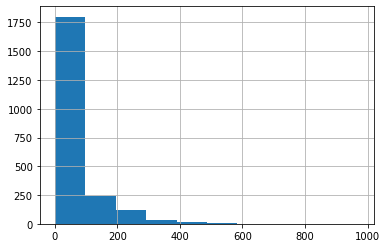

In [301]:
minutes_smart = minutes[minutes['tariff'] == 'smart']
minutes_smart['excess'].hist(bins=10)
minutes_smart['excess'].describe()

In [302]:
minutes_smart[minutes_smart['excess'] > 0].count() / minutes_smart['excess'].count()

user_id        0.365722
month          0.365722
name           0.365722
value          0.365722
tariff         0.365722
included       0.365722
excess         0.365722
extra_money    0.365722
city           0.365722
dtype: float64

count    2223.000000
mean      431.067926
std       194.041303
min         1.000000
25%       292.500000
50%       436.000000
75%       561.000000
max      1473.000000
Name: value, dtype: float64

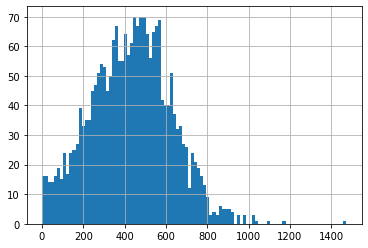

In [303]:
minutes_smart['value'].hist(bins = 100)
minutes_smart['value'].describe()

In [304]:
mean_calls_smart = minutes_smart['value'].mean()
variance_calls_smart = np.var(minutes_smart['value'])
standard_deviation_calls_smart = np.std(minutes_smart['value'])
var_calls_smart = standard_deviation_calls_smart / mean_calls_smart

In [305]:
print('Среднее значение данных: {:.5}'.format(mean_calls_smart))
print('Дисперсия: {:.7}'.format(variance_calls_smart))
print('Стандартное откланение: {:.5}'.format(standard_deviation_calls_smart))
print('Коэффициент вариации: {:.2%}'.format(var_calls_smart))

Среднее значение данных: 431.07
Дисперсия: 37635.09
Стандартное откланение: 194.0
Коэффициент вариации: 45.00%


Вывод
---
   1. Среднее значение затраченых минут в месяц равно 431,07 минута
   2. Дисперсия равна 37635,09 кв минуты
   3. Стандартное отклонение равно 194,0 минуты
   4. Коэффициент вариации равен 0,45
   5. Распредление затраченых минут на тарифе "Ультра" в укрупненном виде близко к нормальному распределению.
   
О пользователеях тарифа Смарт можно сказать следующие:
---
1.	Часть пользователей не вписывается в лимит по звонкам.
2.	Составить прогноз звонков достаточно сложно, т.к. наблюдается достаточно большой разброс затраченых минут на звонки.



------------

# Комментарии 2

Хорошо)

------------

Сколько сообщений требуется пользователям каждого тарифа в месяц?
---

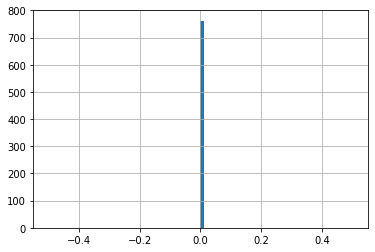

In [306]:
message = result_users_2[result_users_2['name'] == 'count_message']
message_ultra = message[message['tariff'] == 'ultra']
message_ultra['excess'].hist(bins=100)


count    762.000000
mean      61.195538
std       44.716597
min        1.000000
25%       25.000000
50%       52.000000
75%       88.000000
max      224.000000
Name: value, dtype: float64

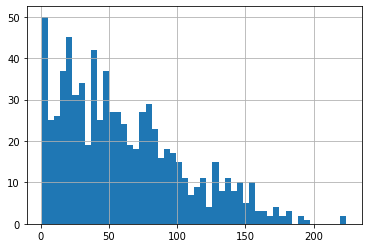

In [307]:
message_ultra['value'].hist(bins=50)
message_ultra['value'].describe()

Рассчитаем характеристики выборки

In [308]:
mean_message_ultra = message_ultra['value'].mean()
variance_message_ultra = np.var(message_ultra['value'])
standard_deviation_message_ultra = np.std(message_ultra['value'])
var_message_ultra = standard_deviation_message_ultra / mean_message_ultra

In [309]:
print('Среднее значение данных: {:.5}'.format(mean_message_ultra))
print('Дисперсия: {:.7}'.format(variance_message_ultra))
print('Стандартное откланение: {:.5}'.format(standard_deviation_message_ultra))
print('Коэффициент вариации: {:.2%}'.format(var_message_ultra))

Среднее значение данных: 61.196
Дисперсия: 1996.95
Стандартное откланение: 44.687
Коэффициент вариации: 73.02%


Вывод
---
   1. Среднее значение отправленных сообщений в месяц равно 61,196 собщения
   2. Дисперсия равна 1996,95 кв сообщения
   3. Стандартное отклонение равно 44,687 сообщения
   4. Коэффициент вариации равен 0,7302
   5. Распредление отправленных на тарифе "Ультра" в очень укрупненном виде близко к распределению Пуссона.
   
О пользователеях тарифа Ультра можно сказать следующие:
---
1.	Они вписываются в лимит количества сообщений в месяц.
2.	Составить прогноз количества отправленных сообщений практически не возможно, т.к. наблюдается достаточно большой разброс отправленных сообщений


------------

# Комментарии 2

Хорошо) составить прогноз количества отправленных сообщений на основе чего?

------------

count    1916.000000
mean        6.747390
std        14.277184
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max        93.000000
Name: excess, dtype: float64

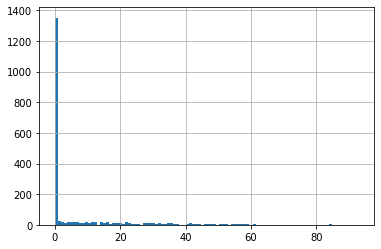

In [310]:
message_smart = message[message['tariff'] == 'smart']
message_smart['excess'].hist(bins=100)
message_smart['excess'].describe()

In [311]:
message_smart[message_smart['excess'] > 0].count() / message_smart['excess'].count()

user_id        0.294363
month          0.294363
name           0.294363
value          0.294363
tariff         0.294363
included       0.294363
excess         0.294363
extra_money    0.294363
city           0.294363
dtype: float64

count    1916.000000
mean       38.747390
std        26.817396
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: value, dtype: float64

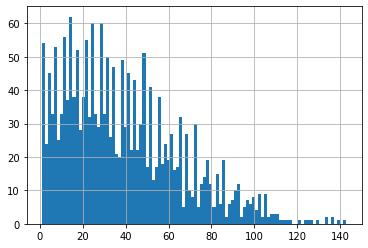

In [312]:
message_smart['value'].hist(bins=100)
message_smart['value'].describe()

In [313]:
mean_message_smart = message_smart['value'].mean()
variance_message_smart = np.var(message_smart['value'])
standard_deviation_message_smart = np.std(message_smart['value'])
var_message_smart = standard_deviation_message_smart / mean_message_smart

In [314]:
print('Среднее значение данных: {:.5}'.format(mean_message_smart))
print('Дисперсия: {:.7}'.format(variance_message_smart))
print('Стандартное откланение: {:.5}'.format(standard_deviation_message_smart))
print('Коэффициент вариации: {:.2%}'.format(var_message_smart))

Среднее значение данных: 38.747
Дисперсия: 718.7974
Стандартное откланение: 26.81
Коэффициент вариации: 69.19%


Вывод_сообщения_СМАРТ
---
   1. Среднее значение отправленных сообщений в месяц равно 38,747 собщения
   2. Дисперсия равна 718,7974 кв сообщения
   3. Стандартное отклонение равно 26,81 сообщения
   4. Коэффициент вариации равен 0,6919
   5. Распредление отправленных на тарифе "Ультра" в очень укрупненном виде близко к распределению Пуссона.
   
О пользователеях тарифа СМАРТ можно сказать следующие:
---
   1. Часть пользователей не вписывается в лимит по отправляемым сообщениям.
   2. Составить прогноз количества отправленных сообщений практически не возможно, т.к. наблюдается достаточно большой разброс отправленных сообщений


------------

# Комментарии 2

Хорошо)

------------

Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
----

In [315]:
internet = result_users_2[result_users_2['name'] == 'sum_mb_used']
internet.head()


,user_id,month,name,value,tariff,included,excess,extra_money,city
2,1000,5,sum_mb_used,2257.0,ultra,30720,0.0,0.0,краснодар
5,1000,6,sum_mb_used,23262.0,ultra,30720,0.0,0.0,краснодар
8,1000,7,sum_mb_used,14017.0,ultra,30720,0.0,0.0,краснодар
11,1000,8,sum_mb_used,14072.0,ultra,30720,0.0,0.0,краснодар
14,1000,9,sum_mb_used,14583.0,ultra,30720,0.0,0.0,краснодар


In [316]:
internet_ultra = internet[internet['tariff'] == 'ultra']

count      941.000000
mean       769.594049
std       2466.757843
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      19073.000000
Name: excess, dtype: float64

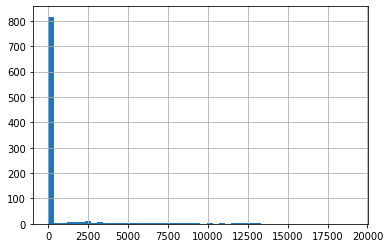

In [317]:
internet_ultra['excess'].hist(bins = 50)
internet_ultra['excess'].describe()

In [318]:
internet_ultra[internet_ultra['excess'] > 0].count() / internet_ultra['excess'].count()

user_id        0.136026
month          0.136026
name           0.136026
value          0.136026
tariff         0.136026
included       0.136026
excess         0.136026
extra_money    0.136026
city           0.136026
dtype: float64

Есть небольшое количество, которое перерасходует выделенный объем интернета.

count      941.000000
mean     19689.761955
std       9988.514358
min          1.000000
25%      11887.000000
50%      19447.000000
75%      26890.000000
max      49793.000000
Name: value, dtype: float64

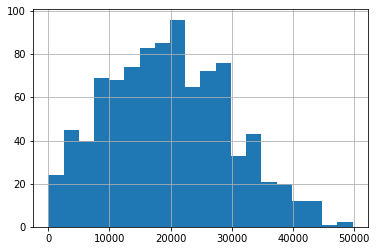

In [319]:
internet_ultra['value'].hist(bins = 20)
internet_ultra['value'].describe()

In [320]:
mean_internet_ultra = internet_ultra['value'].mean()
variance_internet_ultra = np.var(internet_ultra['value'])
standard_deviation_internet_ultra = np.std(internet_ultra['value'])
var_internet_ultra = standard_deviation_internet_ultra / mean_internet_ultra

In [321]:
print('Среднее значение данных: {:.7}'.format(mean_internet_ultra))
print('Дисперсия: {:.9}'.format(variance_internet_ultra))
print('Стандартное откланение: {:.5}'.format(standard_deviation_internet_ultra))
print('Коэффициент вариации: {:.2%}'.format(var_internet_ultra))

Среднее значение данных: 19689.76
Дисперсия: 99664393.1
Стандартное откланение: 9983.2
Коэффициент вариации: 50.70%


Вывод
---
   1. Среднее значение затраченых Мб в месяц равно 19689.76 Мб
   2. Дисперсия равна 99664393.1 кв Мб
   3. Стандартное отклонение равно 9983.2 Мб
   4. Коэффициент вариации равен 0.5070
   5. Распредление затраченых минут на тарифе "Ультра" в укрупненном виде близко к нормальному распределению.
   
О пользователеях тарифа Ультра можно сказать следующие:
---
   1. Часть пользователей интернета затрачивает больше, чем предусмотрено тариффом.
   2. Составить прогноз затраченых Мб достаточно сложно, т.к. наблюдается достаточно большой разброс затраченных Мб
   

In [322]:
internet_smart = internet[internet['tariff'] == 'smart']

count     2222.000000
mean      2780.593159
std       3612.210073
min          0.000000
25%          0.000000
50%       1178.000000
75%       4727.000000
max      23268.000000
Name: excess, dtype: float64

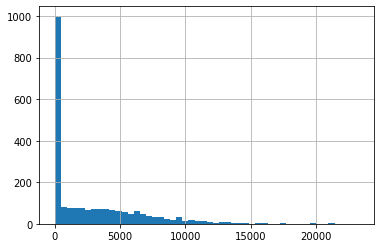

In [323]:
internet_smart['excess'].hist(bins = 50)
internet_smart['excess'].describe()

In [324]:
internet_smart[internet_smart['excess'] > 0].count() / internet_smart['excess'].count()

user_id        0.587759
month          0.587759
name           0.587759
value          0.587759
tariff         0.587759
included       0.587759
excess         0.587759
extra_money    0.587759
city           0.587759
dtype: float64

count     2222.00000
mean     16245.90279
std       5876.97638
min          1.00000
25%      12678.75000
50%      16538.00000
75%      20087.00000
max      38628.00000
Name: value, dtype: float64

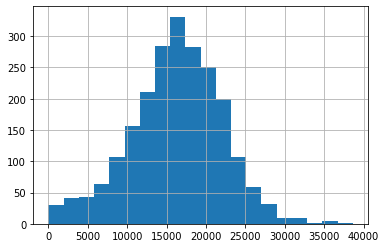

In [325]:
internet_smart['value'].hist(bins = 20)
internet_smart['value'].describe()

In [326]:
mean_internet_smart = internet_smart['value'].mean()
variance_internet_smart = np.var(internet_smart['value'])
standard_deviation_internet_smart = np.std(internet_smart['value'])
var_internet_smart = standard_deviation_internet_smart / mean_internet_smart

In [327]:
print('Среднее значение данных: {:.7}'.format(mean_internet_smart))
print('Дисперсия: {:.9}'.format(variance_internet_smart))
print('Стандартное откланение: {:.5}'.format(standard_deviation_internet_smart))
print('Коэффициент вариации: {:.2%}'.format(var_internet_smart))

Среднее значение данных: 16245.9
Дисперсия: 34523307.3
Стандартное откланение: 5875.7
Коэффициент вариации: 36.17%


Вывод
---
   1. Среднее значение затраченых Мб в месяц равно 16245.9 Мб
   2. Дисперсия равна 34523307.3 кв Мб
   3. Стандартное отклонение равно 5875.7 Мб,
   4. Коэффициент вариации равен 0,3617
   5. Распредление затраченых минут на тарифе "Смарт" в укрупненном виде близко к нормальному распределению.
   
О пользователеях тарифа Ультра можно сказать следующие:
---
   1. Часть пользователей интернета затрачивает больше, чем предусмотрено тариффом.
   2. Составить прогноз затраченых Мб достаточно проще чем по всем ранее анализированным данным.

Просмотрим сколько в среднем платят пользователи тарифов __Ультра__ и __Смарт__

In [328]:
incom.head()

,user_id,month,extra_money,tariff,rub_monthly_fee,total_income,city
0,1000,5,0.0,ultra,1950,1950.0,краснодар
1,1000,6,0.0,ultra,1950,1950.0,краснодар
2,1000,7,0.0,ultra,1950,1950.0,краснодар
3,1000,8,0.0,ultra,1950,1950.0,краснодар
4,1000,9,0.0,ultra,1950,1950.0,краснодар


In [329]:
incom_ultra = incom[incom['tariff'] == 'ultra']
incom_smart = incom[incom['tariff'] == 'smart']

In [330]:
incom_ultra.describe()


,user_id,month,extra_money,rub_monthly_fee,total_income
count,951.000000,951.000000,951.000000,951.0,951.000000
mean,1264.766562,8.235542,111.548083,1950.0,2061.548083
std,140.413405,2.883937,359.618742,0.0,359.618742
min,1000.000000,1.000000,0.000000,1950.0,1950.000000
25%,1148.000000,6.000000,0.000000,1950.0,1950.000000
50%,1281.000000,9.000000,0.000000,1950.0,1950.000000
75%,1381.000000,11.000000,0.000000,1950.0,1950.000000
max,1495.000000,12.000000,2793.896484,1950.0,4743.896484


In [331]:
incom_ultra[incom_ultra['extra_money'] > 0].count() / incom_ultra['extra_money'].count()

user_id            0.134595
month              0.134595
extra_money        0.134595
tariff             0.134595
rub_monthly_fee    0.134595
total_income       0.134595
city               0.134595
dtype: float64

In [332]:
incom_smart.describe()

,user_id,month,extra_money,rub_monthly_fee,total_income
count,2223.000000,2223.000000,2223.000000,2223.0,2223.000000
mean,1245.904184,8.344130,703.184428,550.0,1253.184428
std,145.837842,2.922009,798.793135,0.0,798.793135
min,1001.000000,1.000000,0.000000,550.0,550.000000
25%,1121.000000,6.000000,3.000000,550.0,553.000000
50%,1239.000000,9.000000,440.468750,550.0,990.468750
75%,1376.000000,11.000000,1156.664062,550.0,1706.664062
max,1499.000000,12.000000,6218.531250,550.0,6768.531250


In [333]:
incom_smart[incom_smart['total_income'] > 1950].count() / incom_smart['extra_money'].count()

user_id            0.179487
month              0.179487
extra_money        0.179487
tariff             0.179487
rub_monthly_fee    0.179487
total_income       0.179487
city               0.179487
dtype: float64

Общий вывод по разделу
---

__Пользователи тарифа "Ультра"__
   1. Пользователем данного тарифа достаточно минут разговоров и количества сообщений, включенный в тарифный план.
   2. 13.68% пользователей данного тарифа выходят за лимиты по тратам на интернет
   3. Для потребителей Тарифа Ультра для затраченных минут и отправленных сообщений наиболее близко распределение Пуассона, при потреблении Мб нормальное распределение.
   4. Прогноз потребления _минут разговоров, отправленных сообщений, затраченных Мб_ будет относительно непрадоподобный, так как воведение потребителей из месяца в месяц не однородная.
   5. Пользователи, которые приносят более 1950 рублей в месяц составляет 13,74%

__Пользователи тарифа "Смарт"__
   1. Пользователи данного тарифа превышают лимиты минут разговоров, количества отправленных сообщений, затраченых Мб трафика:
      - +36.57% для минут
      - +29.44% для сообщений
      - +58.77% для интернет-трафика
   2. Для потребителей тарифа Смарт для отправленных сообщений наиболее близко распределение Пуассона, для затраченных минут и интернет трафика - нормальное распределение.
   3. Попробовать спрогнозировать данные для затраченных минут и количества отправленных сообщений достаточно сложно, т.к. данные не однородны. Для затраченных Мб уже возможно, так как данные при распределении приблежаются к однородности, что позволит составлять прогностические модели, хотя и с большей ошибкой в прогнозе.
   4. Пользователей, которые приносят более 1950 рублей в месяц составляет 18,87%          

------------

# Комментарии 2

Хорошо)

------------

Шаг 4. Проверьте гипотезы
---
   - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
   - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
   
Пороговое значение alpha задайте самостоятельно.

Первая гипотиза звучит так __"Средняя месячная выручка пользователя тарифа Ультра соотвествует среднемесяной выручке пользователя тарифа Смарт"__

------------

# Комментарии 2

Хорошо)

Для написания гипотез существует стандартная формулировка, которой стоит придерживаться. Формулируют нулевую нипотезу и альтернативную. При проведение тестов пытаются подтвердить нулевую :)

------------

In [334]:
incom_ultra.head()

,user_id,month,extra_money,tariff,rub_monthly_fee,total_income,city
0,1000,5,0.0,ultra,1950,1950.0,краснодар
1,1000,6,0.0,ultra,1950,1950.0,краснодар
2,1000,7,0.0,ultra,1950,1950.0,краснодар
3,1000,8,0.0,ultra,1950,1950.0,краснодар
4,1000,9,0.0,ultra,1950,1950.0,краснодар


In [335]:
incom_smart.head()

,user_id,month,extra_money,tariff,rub_monthly_fee,total_income,city
8,1001,11,605.468750,smart,550,1155.468750,москва
9,1001,12,0.000000,smart,550,550.000000,москва
10,1002,6,0.000000,smart,550,550.000000,стерлитамак
11,1002,7,440.429688,smart,550,990.429688,стерлитамак
12,1002,8,976.171875,smart,550,1526.171875,стерлитамак


In [336]:
mean_incom_ultra = incom_ultra['total_income'].mean()
alpha = 0.05


In [359]:
results_1 = st.ttest_ind(
    incom_smart['total_income'], 
    mean_incom_ultra)

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


------------

# Комментарии 2

Почему ты используешь данный тест для проверки гипотезы о равенстве средних? Как проверяется гипотеза о равенстве средних? 

**P.S.** Тебе нужен **ttest_ind**

------------

In [360]:
'p-значение:', results_1.pvalue

('p-значение:', nan)

In [361]:
if results_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


------------

# Комментарии 2

Когда пишешь вывод по проверке гипотез, то следует писать в твоем случае: **"На 5 процентном уровне значимости нулевая гипотеза отвергается."**

------------

In [340]:
mean_incom_ultra

2061.54808261041

In [341]:
incom_smart['total_income'].mean()

1253.1844284188035

_Как видно гипотиза о том, что средний доход с пользователя тарифа Ультра соотвествует среднемесячной выручке пользователя Смарт не подтвердилась_. 

__Соотвественно среднемесяная выручка пользователя тарифа Ультра отличается от среднемесяной выручки пользователей Смарт__

------------

# Комментарии 2

Хорошо)

------------

Ответим на вопрос средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [342]:
incom_moscow = incom[incom['city'] == 'москва']
incom_non_moscow = incom[incom['city'] != 'москва']

In [343]:
incom_moscow.head()

,user_id,month,extra_money,tariff,rub_monthly_fee,total_income,city
8,1001,11,605.46875,smart,550,1155.46875,москва
9,1001,12,0.00000,smart,550,550.00000,москва
17,1003,8,0.00000,ultra,1950,1950.00000,москва
18,1003,9,0.00000,ultra,1950,1950.00000,москва
19,1003,10,0.00000,ultra,1950,1950.00000,москва


In [344]:
incom_non_moscow.head()

,user_id,month,extra_money,tariff,rub_monthly_fee,total_income,city
0,1000,5,0.0,ultra,1950,1950.0,краснодар
1,1000,6,0.0,ultra,1950,1950.0,краснодар
2,1000,7,0.0,ultra,1950,1950.0,краснодар
3,1000,8,0.0,ultra,1950,1950.0,краснодар
4,1000,9,0.0,ultra,1950,1950.0,краснодар


__2. За _0_ гипотизу принимаем данные о том, что средний доход от пользователей тарифов в москве соотвествует среднему доходу в других регионах.__

Уровень значимости 0.05

In [345]:
incom_moscow['total_income'].mean()

1517.5570824795082

In [346]:
alpha = 0.05
results_2 = st.ttest_1samp(
    incom_non_moscow['total_income'], 
    incom_moscow['total_income'].mean())


In [347]:
'p-значение:', results_2.pvalue

('p-значение:', 0.08253780486690716)

In [348]:
if results_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


__Можно сказать, что нет разгронечения между регионами по доходам, они везде одинаковые.__

__3. За _0_ гипотизу принимаем данные о том, что средний доход от пользователей тарифов ультра и смарт в москве соотвествует среднему доходу в других регионах в разрезе тарифов.__

In [349]:
incom_ultra_moscow = incom_ultra[incom_ultra['city'] == 'москва']
incom_ultra_non_moscow = incom_ultra[incom_ultra['city'] != 'москва']

In [350]:
alpha = 0.05
results_3 = st.ttest_1samp(
    incom_ultra_non_moscow['total_income'], 
    incom_ultra_moscow['total_income'].mean())

In [351]:
if results_3.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


In [352]:
incom_smart_moscow = incom_ultra[incom_ultra['city'] == 'москва']
incom_smart_non_moscow = incom_ultra[incom_ultra['city'] != 'москва']

In [353]:
alpha = 0.05
results_4 = st.ttest_1samp(
    incom_smart_non_moscow['total_income'], 
    incom_smart_moscow['total_income'].mean())

In [354]:
if results_4.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


__Проверем как взаимосвязаны пользователи тарифа в смарт в Москве с пользователями тарифа Ultra вне ее__

In [355]:
alpha = 0.05
results_5 = st.ttest_1samp(
    incom_ultra_non_moscow['total_income'], 
    incom_smart_moscow['total_income'].mean())

In [356]:
if results_5.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Мы видем, что пользователи тарифа смарт в Москве в среднем в месяц тратят столько же сколько и пользователи тарифа ультра не в Москве

__Проверем как взаимосвязаны пользователи тарифа в Ультра в Москве с пользователями тарифа Смарт вне ее__

In [357]:
alpha = 0.05
results_6 = st.ttest_1samp(
    incom_smart_non_moscow['total_income'], 
    incom_ultra_moscow['total_income'].mean())

In [358]:
if results_6.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


_Не понимаю почему так получилось, вроде бы не должно так быть (возможно ошибся в вычислениях или не правильно построил гипотезы)_

------------

# Комментарии 2

Скорее всего ответ лежит в выборе метода проверки гипотез.

------------

Резюме от проделанной работы
----
   1. Открыты файлы с данными и изучина общая информацию. Путь к файлам:
      - /datasets/calls.csv
      - /datasets/internet.csv
      - /datasets/messages.csv
      - /datasets/tariffs.csv
      - /datasets/users.csv
   2. Подготовлены данные
      - Данные в столбцах _reg_date, churn_date, call_date, session_date_ приведен к типу __datetime64[ns]__
      - Найдены излишнее количество _0_ значений в таблицах _calls['duration']_ и _internet['mb_used']_. Для того, что бы понять как с этими данными поступить лучше задать вопросы:
        1. Списывается ли одна минута звонка при значении duration = 0?
        2. Списывается ли 1 Мб при значения  mb_used = 0?
      - Так как доля данных с 0 высока и предпологая, что компания __0__ значения не округляет, то для дальнейшего анализа не будем использовать эти данные.
   3. Посчитаны для каждого пользователя:
      - количество сделанных звонков и израсходованных минут разговора по месяцам;
      - количество отправленных сообщений по месяцам;
      - объем израсходованного интернет-трафика по месяцам;
      - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана).
   4. Описано поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитано среднее количество, дисперсию и стандартное отклонение. Построены гистограммы. Опишисано распределение.
   5. Проверены гипотезы: 
      - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
      - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов:
         - Средний месячный доход от пользователей Тарифов в Москве и вне нее не отличается
         - Средний месячный доход от пользователей тарифа смарт в Москве не отличается от пользователей тарифа ультра вне Москвы
         - Средний месячный тарифа ультра не отличается в Москве не отличается от пользователей тариф смарт вне ее стен;
      
   
   


Выводы по работе
---
Общий вывод по разделу
---

__Пользователи тарифа "Ультра"__
   1. Пользователем данного тарифа достаточно минут разговоров и количества сообщений, включенный в тарифный план.
   2. 13.68% пользователей данного тарифа выходят за лимиты по тратам на интернет
   3. Для потребителей Тарифа Ультра для затраченных минут и отправленных сообщений наиболее близко распределение Пуассона, при потреблении Мб нормальное распределение.
   4. Прогноз потребления _минут разговоров, отправленных сообщений, затраченных Мб_ будет относительно непрадоподобный, так как воведение потребителей из месяца в месяц не однородная.
   5. Пользователи, которые приносят более 1950 рублей в месяц составляет 13,74%

__Пользователи тарифа "Смарт"__
   1. Пользователи данного тарифа превышают лимиты минут разговоров, количества отправленных сообщений, затраченых Мб трафика:
      - +36.57% для минут
      - +29.44% для сообщений
      - +58.77% для интернет-трафика
   2. Для потребителей тарифа Смарт для отправленных сообщений наиболее близко распределение Пуассона, для затраченных минут и интернет трафика - нормальное распределение.
   3. Попробовать спрогнозировать данные для затраченных минут и количества отправленных сообщений достаточно сложно, т.к. данные не однородны. Для затраченных Мб уже возможно, так как данные при распределении приблежаются к однородности, что позволит составлять прогностические модели, хотя и с большей ошибкой в прогнозе.
   4. Пользователей, которые приносят более 1950 рублей в месяц составляет 18,87%          
   
Вывод по гипотизам:
---
   1. Средний месячный доход пользователей смарт не соотвествует среднему месячному доходов ультра
   2. Средний месячный доход от пользователей Тарифов в Москве и вне нее не отличается
   3. Средний месячный доход от пользователей тарифа смарт в Москве не отличается от пользователей тарифа ультра вне Москвы.
   4. Средний месячный тариф от пользователей тарифа ультра в Москве не отличается от пользователей тариф смарт вне ее стен (__почему это произошло не понимаю__)


   Рекомендации
   ---
   1. Таким образом можно сказать, что для компании "Мегалайна" лучше развивать тарифы с небольшим объемом абоненской платы, но с завышенной стоимостью минут, сообщений и Мб. (__т.к. максмиальный месячный платеж по тарифу смарт - 6711,21 рублей, ультра - 4743,31 рублей__)
   2. Необходимо развивать интернет-трафик, т.к это единственная позиция, которая превышает как у пользователей тарифов __Ультра__ и __Смарт__. 
   3. Лучшим способом это делать с помощью мобильных приложений:
      - [Количество загрузок мобильных приложений растет](https://www.statista.com/statistics/271644/worldwide-free-and-paid-mobile-app-store-downloads/)
      - [Люди в возрасте от 18 до 24 лет тратили 66 процентов своего цифрового мультимедийного времени с помощью приложений для смартфонов](https://www.comscore.com/Insights/Presentations-and-Whitepapers/2017/The-2017-US-Mobile-App-Report)
   4. Это приводит к необходимости организации доступных продаж смартфонов и гаджетов:
        - организация распродаж смартфонов со скидкой (в рассрочку, кредит или лизинг), но привязкой к тарифам класса Смарт (лучше всего это разбить на сегменты: студенты, пенсионеры, школьники (например для обучения "смарт-обучение").
        - создание тарифов со скидками:
           - Тарифы для социальных сетей
           - Тарифы для музыки
           - Тарифы для чтения
           - Тарифы для видео
           - Возможно тарифы для просмотра видео
           - Тарифы для игр
   5. Для людей, которые пользуются тарифами класса ultra, дополнительно разрабатывать и предлагать дополнительные сервисы, например сервис "Умный дом" или "Музыкальная студия в смартфоне" (для создания оранжеровок) и т.п. (это необходимо анализировать дополнительно)
   6. Увеличивать средний объем трат по интернет-трафику для пользователей тарифов смарт

------------

# Комментарии 2

Отлично :)

Очень хорошее резюме по проекту, выводы и рекомендации :)

------------

------------

# Комментарии 2

Ты справился с проектом  :) Хорошая работа) но немного напутал с методами проверки гипотез :(

Здорово, что в этот раз ты написал резюме по работе, описал основные выводы и **дал рекомендации** :)

Для того, чтобы улучшить работу, тебе стоит разобраться с методом **merge**. Этот метод упростит объединение таблиц :)

Также, старайся использовать меньше лишних переменных (созданных для расчета какого-то значения, которое далее не используется, или срезов таблиц, которые далее не рассматриваются). Это позволит сделать тетрадку более чистой, и задействовать меньше памяти в работе :)

Надеюсь, что ты учтешь мои комментарии :)

***Удачи !!!***

------------